# Importando bibliotecas

In [1]:
import numpy as np         # para fazer contas e mexer com matrizes
import pandas as pd        # para montar DataFrames (tabelas de bancos de dados)

import matplotlib.pyplot as plt
import seaborn as sns

import modelos as m

# CUIDADO!!! Para esconder os avisos do curvefit():
import warnings
warnings.filterwarnings("ignore")

In [2]:
# para não precisar reiniciar o kernel do jupyter-notebook quando mudar os arquivos .py
%load_ext autoreload
%autoreload 2

In [3]:
sns.set_theme()

# Lendo dados

In [4]:
dadosdf = m.carrega_pickles()

Lendo porquinho_mra34.pickle			
Lendo porquinho_mra28.pickle			
Lendo porquinho_mra31.pickle			
Lendo porquinho_mra32.pickle			
Lendo porquinho_mra26.pickle			
Lendo porquinho_mra29.pickle			
Lendo porquinho_mra33.pickle			


## Incluindo volume esperado no dataframe

Volumes esperados:

* MRA26: 2622.9 mL; K = 0.0309
* MRA28: 2105.9 mL; K = 0.0447
* MRA29: 2205.7 mL; K = 0.0596
* MRA31: 1974.4 mL; K = 0.0619
* MRA32: 1440.2 mL; K = 0.0476
* MRA33: 2154.6 mL; K = 0.0634
* MRA34: 2211.2 mL; K = 0.0544

In [5]:
v_esperado = {
    "mra26": 2622.9,
    "mra28": 2105.9,
    "mra29": 2205.7,
    "mra31": 1974.4,
    "mra32": 1440.2,
    "mra33": 2154.6,
    "mra34": 2211.2
}

In [6]:
dadosdf["volume_esperado"] = dadosdf.apply(lambda row: v_esperado[row.Animal], axis=1)

In [7]:
dadosdf

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado
0,mra34,C,"[[9.928905963897705, -259.58831787109375], [20...",4,"[9.928905963897705, 14.968489646911621, 20.058...","[-259.58831787109375, -81.21270751953125, 147....",2211.2
1,mra34,D,"[[9.9609375, -167.6243133544922], [20.25208377...",5,"[9.9609375, 15.040364742279053, 20.13463592529...","[-167.6243133544922, 13.06080150604248, 203.19...",2211.2
2,mra34,B,"[[10.135156631469727, -149.72845458984375], [2...",3,"[10.135156631469727, 15.052343845367432, 20.00...","[-149.72845458984375, 36.645347595214844, 243....",2211.2
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",2105.9
4,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",2105.9
5,mra28,D,"[[10.240625381469727, -179.3195037841797], [20...",5,"[10.240625381469727, 14.828125, 20.05937480926...","[-179.3195037841797, -62.187042236328125, 182....",2105.9
6,mra31,D,"[[10.0, -107.7169418334961], [20.2000007629394...",5,"[10.0, 15.0, 20.100000381469727, 24.8999996185...","[-107.7169418334961, 47.35507583618164, 235.19...",1974.4
7,mra31,B,"[[10.300000190734863, -25.01786231994629], [20...",3,"[10.300000190734863, 15.100000381469727, 19.89...","[-25.01786231994629, 122.25248718261719, 244.6...",1974.4
8,mra31,C,"[[9.699999809265137, -228.3211212158203], [20....",4,"[9.699999809265137, 15.300000190734863, 20.100...","[-228.3211212158203, -71.18547058105469, 125.5...",1974.4
9,mra32,D,"[[10.625260829925537, -53.54884338378906], [20...",5,"[10.625260829925537, 15.398958206176758, 20.37...","[-53.54884338378906, 33.332923889160156, 174.5...",1440.2


# Testando modelos

## Dados dos modelos

In [34]:
modelos = []

Vmin =  500 # mL
Vmax = 3500 # mL

# sigmoid_recruit_units:
#                 K, Vmax, mi, sigma, offset
mod = m.dados_modelos()
mod.model_function = m.sigmoid_recruit_units
mod.TLC_index = 1
mod.p0 =      [0.05, 2000, 27,    12,   -200]
mod.p2 =      [0.08, 2000, 27,    12,   -200]
mod.bounds = ([0.03, Vmin, 10,     6,   -500],
              [0.07, Vmax, 40,    35,    200])
##############     ,     ,  X,     X,      X.
modelos.append(mod)


# sigmoidvenegas1: (a, b, c, d):  V = a + b/(1 + np.exp(-(x-c)/d))
#              offset, Vmax, 'mi', 'sigma'   
mod = m.dados_modelos()
mod.model_function = m.sigmoidvenegas1
mod.TLC_index = 1
mod.p0 =      [  -200, 2000,   32,      8]
mod.p2 =      [  -200, 2000,   32,      8]
mod.bounds = ([  -500, Vmin,   20,      5],
              [   200, Vmax,   40,     18])
##############      X,     ,    X,      X.
modelos.append(mod)


# sigmoidpaivaoffset: (TLC,k1,k2,offset):  V = TLC/(1+(k1*TCL*np.exp(-k2*x))) + offset
#            Vmax,      k1,   k2, offset
mod = m.dados_modelos()
mod.model_function = m.sigmoidpaivaoffset
mod.TLC_index = 0
mod.p0 =      [  2000,   0.03, 0.13,   -200]
mod.p2 =      [  2000,   0.03, 0.13,   -200]
mod.bounds = ([  Vmin,  0.008, 0.08,   -500],
              [  Vmax,   0.15, 0.25,    200])
##############       ,      X,    X,      X.
modelos.append(mod)


# sigmoidvenegas2offset: TLC,B,k,c,d: V = (TLC-(B*np.exp(-k*x)))/(1 + np.exp(-(x-c)/d)) + offset
#                Vmax,     B,       k,       c,       d,  offset
mod = m.dados_modelos()
mod.model_function = m.sigmoidvenegas2offset
mod.TLC_index = 0
mod.p0 =      [  2000,     1,       1,      32,       7,    -200]
mod.p2 =      [  2000,     1,       1,      32,       7,    -200]
mod.bounds = ([  Vmin,     1,       1,      15,       4,    -500],
              [  Vmax,     1,       1,      40,      15,     200])
##############       ,     X,       X,       X,       X,       X .
modelos.append(mod)


# sigmoidmurphy: VM,Vm,k1,k2,k3: P = ( k1/(VM-x) ) + ( k2/(Vm-x) ) + k3
#                   VM,      Vm,      k1,      k2,      k3
mod = m.dados_modelos()
mod.model_function = m.sigmoidmurphy
mod.TLC_index = 0
mod.p0 =      [ 1800.0,  -200.0,    6000,    6000,    32.0]
mod.p2 =      [ 1800.0,  -200.0,    6000,    6000,    32.0]
mod.bounds = ([    500,    -600,    2000,    2000,     10],
              [   3500,    -100,   20000,   20000,     40])
##############        ,       X,       X,       X,       X.
mod.invert_PV = True
modelos.append(mod)


# sigmoidmurphyoffset: TLC,offset,k1,k2,k3: P = ( k1/((TLC-offset)-x) ) + ( k2/(offset-x) ) + k3
#                   VM,      Vm,      k1,      k2,      k3
mod = m.dados_modelos()
mod.model_function = m.sigmoidmurphyoffset
mod.TLC_index = 0
mod.p0 =      [ 2000.0,  -200.0,    6000,    6000,    32.0]
mod.p2 =      [ 2000.0,  -200.0,    6000,    6000,    32.0]
mod.bounds = ([   Vmin,    -600,    2000,    2000,     10],
              [   Vmax,    -100,   20000,   20000,     40])
##############        ,       X,       X,       X,       X.
mod.invert_PV = True
modelos.append(mod)


## Entendendo o p0

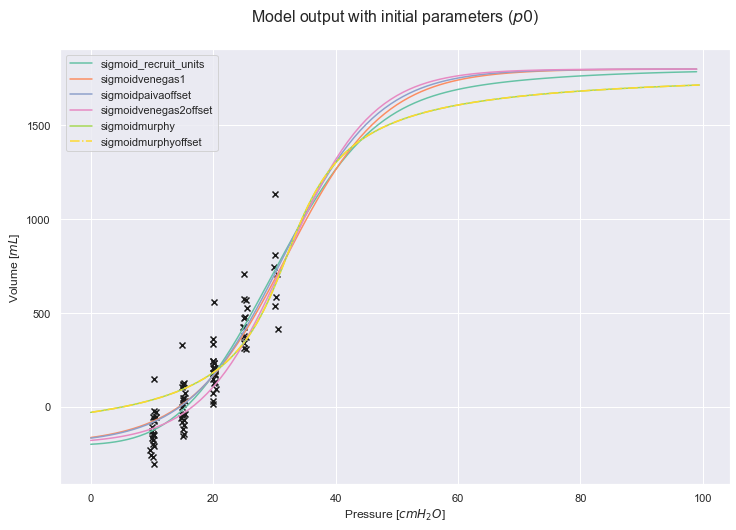

In [35]:
style_lst = ['-','-','-','-','-','-.']
with sns.color_palette("Set2", n_colors=len(modelos)):
    plt.figure(figsize=(12,8))
    for idx,mod in enumerate(modelos):
        #plt.subplot(1,5,idx+1)
        if mod.invert_PV:
            v_min,v_max = m.encontra_volumes_limites_Murphy(mod.p0,modelo=mod.model_function)
            meu_v = np.asarray(range(v_min,v_max))
            meu_p = mod.model_function(meu_v,*(mod.p0))
            plt.plot(meu_p,meu_v,label=mod.model_function.__name__,linestyle=style_lst[idx])
        else:
            meu_p = np.asarray(range(0,100))
            meu_v = mod.model_function(meu_p,*(mod.p0))
            plt.plot(meu_p,meu_v,label=mod.model_function.__name__,linestyle=style_lst[idx])

        #plt.title(mod.model_function.__name__)
        plt.ylabel('Volume [$mL$]')
        plt.xlabel('Pressure [$cmH_2O$]')
        plt.title('Model output with initial parameters ($p0$)', fontsize=16, y=1.05)
        plt.legend()
with sns.color_palette("bright", n_colors=21):
    for idx in range(len(dadosdf)):
        plt.scatter(dadosdf.iloc[idx]['Pressoes'],dadosdf.iloc[idx]['Volumes'],marker='x',c='k')

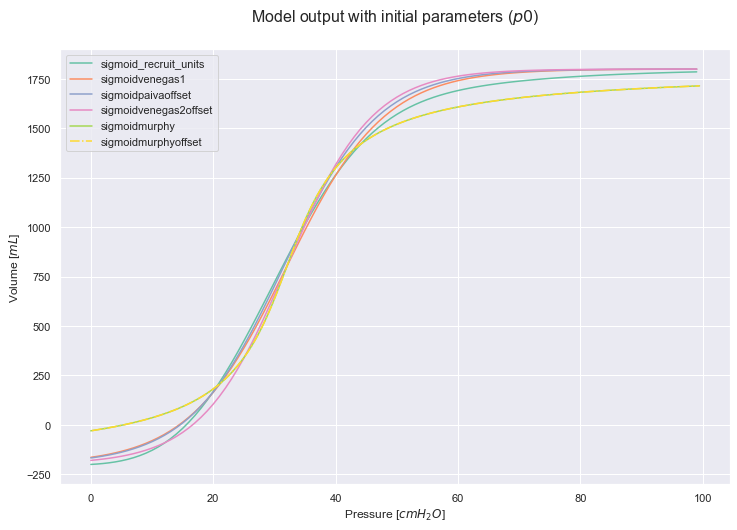

In [11]:
style_lst = ['-','-','-','-','-','-.']
with sns.color_palette("Set2", n_colors=len(modelos)):    
    plt.figure(figsize=(12,8))
    for idx,mod in enumerate(modelos):
        #plt.subplot(1,5,idx+1)
        if mod.invert_PV:
            v_min,v_max = m.encontra_volumes_limites_Murphy(mod.p0,modelo=mod.model_function)
            meu_v = np.asarray(range(v_min,v_max))
            meu_p = mod.model_function(meu_v,*(mod.p0))
            plt.plot(meu_p,meu_v,label=mod.model_function.__name__,linestyle=style_lst[idx])
        else:
            meu_p = np.asarray(range(0,100))
            meu_v = mod.model_function(meu_p,*(mod.p0))
            plt.plot(meu_p,meu_v,label=mod.model_function.__name__,linestyle=style_lst[idx])

        #plt.title(mod.model_function.__name__)
        plt.ylabel('Volume [$mL$]')
        plt.xlabel('Pressure [$cmH_2O$]')
        plt.title('Model output with initial parameters ($p0$)', fontsize=16, y=1.05)
        plt.legend()

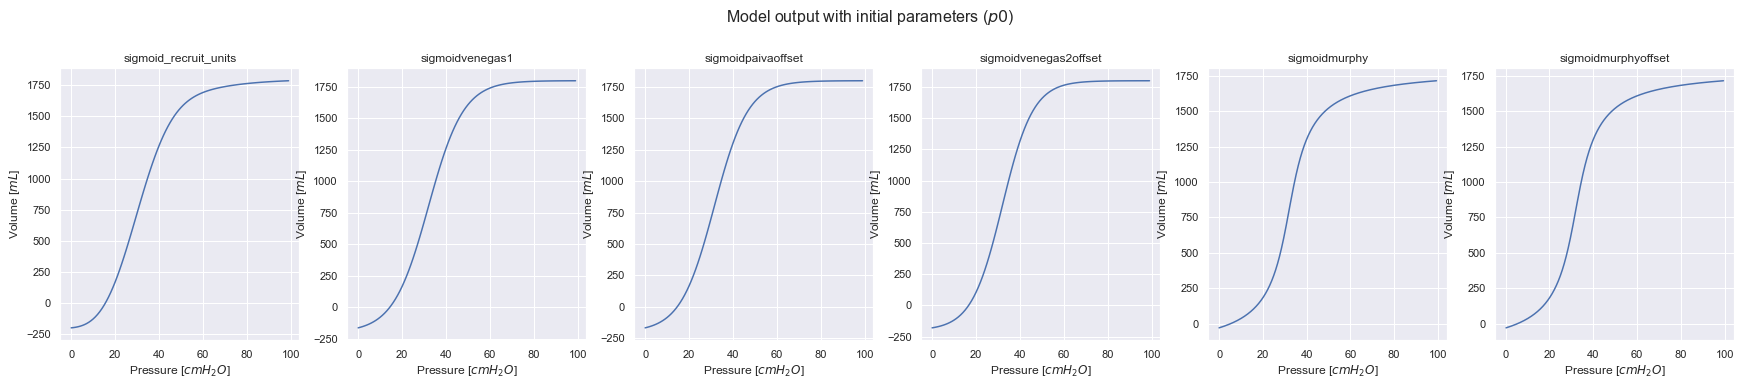

In [12]:
plt.figure(figsize=(30,5))
for idx,mod in enumerate(modelos):
    plt.subplot(1,len(modelos),idx+1)
    if mod.invert_PV:
        v_min,v_max = m.encontra_volumes_limites_Murphy(mod.p0,modelo=mod.model_function)
        meu_v = np.asarray(range(v_min,v_max))
        meu_p = mod.model_function(meu_v,*(mod.p0))
        plt.plot(meu_p,meu_v)
    else:
        meu_p = np.asarray(range(0,100))
        meu_v = mod.model_function(meu_p,*(mod.p0))
        plt.plot(meu_p,meu_v)

    plt.ylabel('Volume [$mL$]')
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.title(mod.model_function.__name__)
    plt.suptitle('Model output with initial parameters ($p0$)', fontsize=16, y=1.05)

## Entendendo os bounds

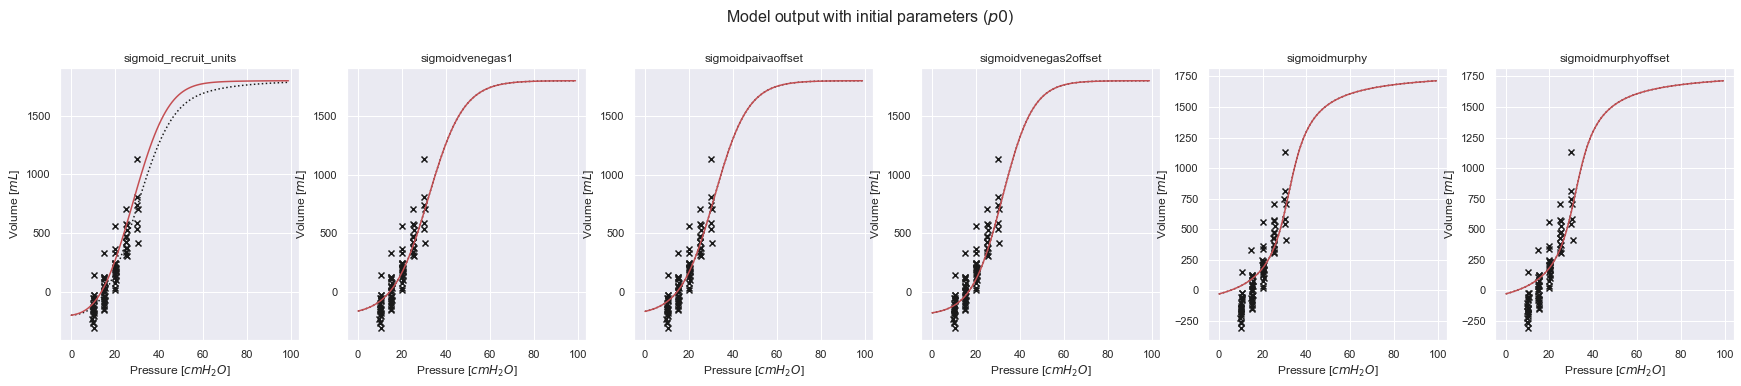

In [37]:
# comparando p0 com p2:
plt.figure(figsize=(30,5))
for idx,mod in enumerate(modelos):
    plt.subplot(1,len(modelos),idx+1)
    if mod.invert_PV:
        v_min,v_max = m.encontra_volumes_limites_Murphy(mod.p0,modelo=mod.model_function)
        meu_v = np.asarray(range(v_min,v_max))
        meu_p = mod.model_function(meu_v,*(mod.p0))
        plt.plot(meu_p,meu_v,'k:')
        v_min,v_max = m.encontra_volumes_limites_Murphy(mod.p2,modelo=mod.model_function)
        meu_v = np.asarray(range(v_min,v_max))
        meu_p = mod.model_function(meu_v,*(mod.p2))
        plt.plot(meu_p,meu_v,'r-')
    else:
        meu_p = np.asarray(range(0,100))
        meu_v = mod.model_function(meu_p,*(mod.p0))
        plt.plot(meu_p,meu_v,'k:')
        meu_p = np.asarray(range(0,100))
        meu_v = mod.model_function(meu_p,*(mod.p2))
        plt.plot(meu_p,meu_v,'r-')

    for idx in range(len(dadosdf)):
        plt.scatter(dadosdf.iloc[idx]['Pressoes'],dadosdf.iloc[idx]['Volumes'],marker='x',c='k')

    plt.ylabel('Volume [$mL$]')
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.title(mod.model_function.__name__)
    plt.suptitle('Model output with initial parameters ($p0$)', fontsize=16, y=1.05)

## Extraindo informações

In [15]:
resultdf_indiv = m.testa_varios_indiv(dadosdf, modelos)

Rodando sigmoid_recruit_units
Rodando sigmoidvenegas1
Rodando sigmoidpaivaoffset
Rodando sigmoidvenegas2offset
Rodando sigmoidmurphy
Rodando sigmoidmurphyoffset


In [16]:
resultdf_indiv

,Animal,Maneuver,n_steps,Pressures,Volumes,Model,Method,TLC_index,N_points_interp,p0,bounds,fitted,parameters,Vol_CT,error
0,mra34,C,4,"[9.928905963897705, 14.968489646911621, 20.058...","[-259.58831787109375, -81.21270751953125, 147....",sigmoid_recruit_units,lm,1,0,"[0.05, 2000, 27, 12, -200]",[],False,[],2211.2,0.000000
1,mra34,D,5,"[9.9609375, 15.040364742279053, 20.13463592529...","[-167.6243133544922, 13.06080150604248, 203.19...",sigmoid_recruit_units,lm,1,0,"[0.05, 2000, 27, 12, -200]",[],False,[],2211.2,0.000000
2,mra34,B,3,"[10.135156631469727, 15.052343845367432, 20.00...","[-149.72845458984375, 36.645347595214844, 243....",sigmoid_recruit_units,lm,1,0,"[0.05, 2000, 27, 12, -200]",[],False,[],2211.2,0.000000
3,mra28,C,4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",sigmoid_recruit_units,lm,1,0,"[0.05, 2000, 27, 12, -200]",[],False,[],2105.9,0.000000
4,mra28,B,3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",sigmoid_recruit_units,lm,1,0,"[0.05, 2000, 27, 12, -200]",[],False,[],2105.9,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,mra29,B,3,"[10.26111125946045, 15.117916584014893, 20.029...","[-307.4459228515625, -156.31631469726562, 16.6...",sigmoidmurphyoffset,dogbox,0,20,"[2000.0, -200.0, 6000, 6000, 32.0]","([500, -600, 2000, 2000, 10], [3500, -100, 200...",False,[],2205.7,0.000000
1886,mra29,C,4,"[10.105555534362793, 15.18842601776123, 20.045...","[-265.270263671875, -145.95188903808594, 74.12...",sigmoidmurphyoffset,dogbox,0,20,"[2000.0, -200.0, 6000, 6000, 32.0]","([500, -600, 2000, 2000, 10], [3500, -100, 200...",False,[],2205.7,0.000000
1887,mra33,D,5,"[10.312239646911621, 14.991406440734863, 20.00...","[-75.62246704101562, 107.81485748291016, 363.4...",sigmoidmurphyoffset,dogbox,0,20,"[2000.0, -200.0, 6000, 6000, 32.0]","([500, -600, 2000, 2000, 10], [3500, -100, 200...",True,"[3001.5123167406214, -600.0, 20000.0, 9942.391...",2154.6,39.307171
1888,mra33,B,3,"[10.303646087646484, 14.871094226837158, 20.07...","[146.587890625, 330.3841552734375, 560.5339355...",sigmoidmurphyoffset,dogbox,0,20,"[2000.0, -200.0, 6000, 6000, 32.0]","([500, -600, 2000, 2000, 10], [3500, -100, 200...",True,"[2399.162461735464, -600.0, 20000.0, 12249.219...",2154.6,11.350713


## Subsets

In [17]:
resultdf_indiv_fitted = resultdf_indiv[resultdf_indiv['fitted']==True]
resultdf_indiv_fitted_lm = resultdf_indiv_fitted[resultdf_indiv_fitted['Method']=='lm']
resultdf_indiv_fitted_trf = resultdf_indiv_fitted[resultdf_indiv_fitted['Method']=='trf']
resultdf_indiv_fitted_dogbox = resultdf_indiv_fitted[resultdf_indiv_fitted['Method']=='dogbox']

## Dados numéricos

In [18]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','fitted','n_steps']].groupby('fitted').describe()

Model                                    n_steps                
       count unique                    top freq   count unique top freq
fitted                                                                 
False    719      6  sigmoidvenegas2offset  254     719      3   3  274
True    1171      6     sigmoidpaivaoffset  276    1171      3   5  458

In [45]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','fitted','N_points_interp','Method','n_steps']].groupby(['Model','Method','fitted']).count()

N_points_interp  n_steps
Model                 Method fitted                          
sigmoid_recruit_units dogbox False                 4        4
                             True                101      101
                      lm     False                80       80
                             True                 25       25
                      trf    True                105      105
sigmoidmurphy         dogbox False                47       47
                             True                 58       58
                      lm     False                84       84
                             True                 21       21
                      trf    False                18       18
                             True                 87       87
sigmoidmurphyoffset   dogbox False                40       40
                             True                 65       65
                      lm     False                84       84
                             True                 21       21
                      trf    False                20       20
                             True                 85       85
sigmoidpaivaoffset    dogbox True                105      105
                      lm     False                39       39
                             True                 66       66
                      trf    True                105      105
sigmoidvenegas1       dogbox False                10       10
                             True                 95       95
                      lm     False                39       39
                             True                 66       66
                      trf    True                105      105
sigmoidvenegas2offset dogbox False               105      105
                      lm     False                44       44
                             True                 61       61
                      trf    False               105      105

In [ ]:
 Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','fitted','n_steps']].groupby(['Model','fitted']).count()

In [20]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','fitted']][resultdf_indiv['fitted']==True].groupby('Model').count()

,fitted
Model,
sigmoid_recruit_units,231
sigmoidmurphy,166
sigmoidmurphyoffset,171
sigmoidpaivaoffset,276
sigmoidvenegas1,266
sigmoidvenegas2offset,61


In [21]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','error']][resultdf_indiv['fitted']==True].groupby('Model').mean()

,error
Model,
sigmoid_recruit_units,-1.949462
sigmoidmurphy,-1.040892
sigmoidmurphyoffset,-3.053070
sigmoidpaivaoffset,-25.036627
sigmoidvenegas1,-22.270873
sigmoidvenegas2offset,-10.867020


## Gráficos

### Quantos dados fitaram

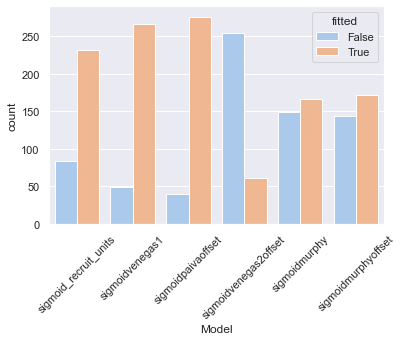

In [22]:
ax = sns.countplot(x="Model", hue="fitted", palette="pastel",
                   data=resultdf_indiv)
for item in ax.get_xticklabels():
    item.set_rotation(45)

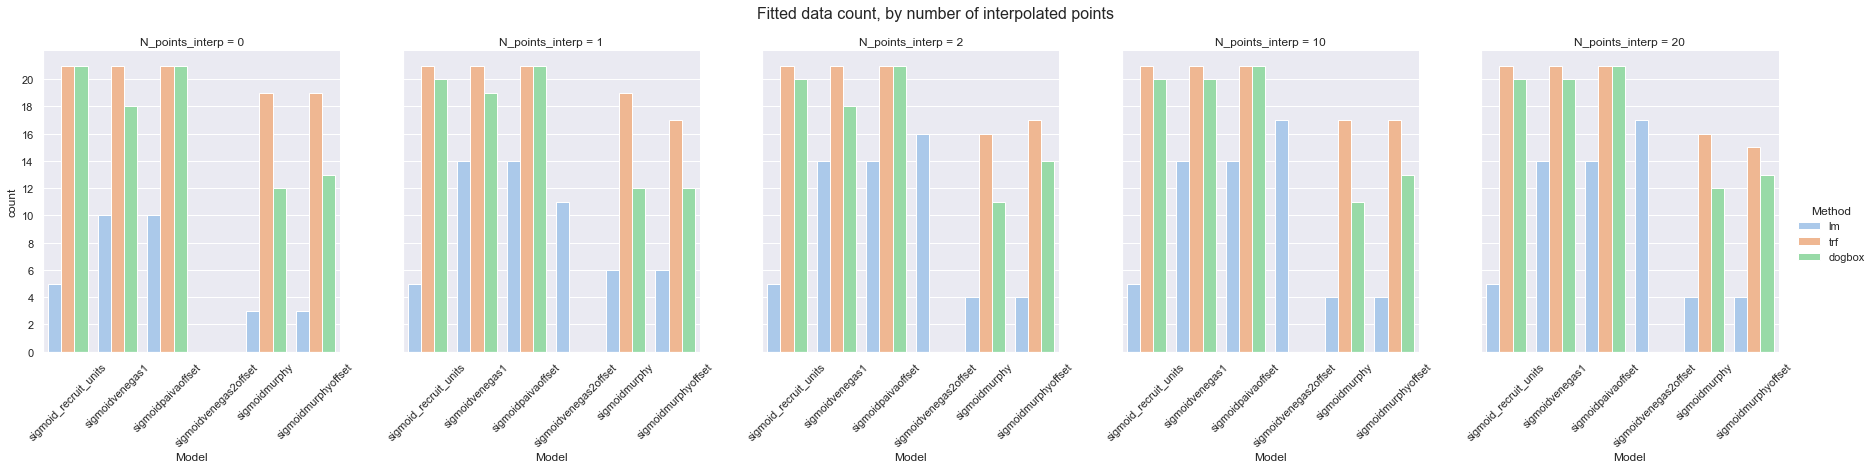

In [23]:
ax2 = sns.catplot(x="Model", kind="count", hue='Method',
            palette="pastel", col="N_points_interp",
            data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=45)
plt.yticks(np.arange(0, 22, step=2))
plt.suptitle('Fitted data count, by number of interpolated points', fontsize=16, y=1.05)
plt.show()

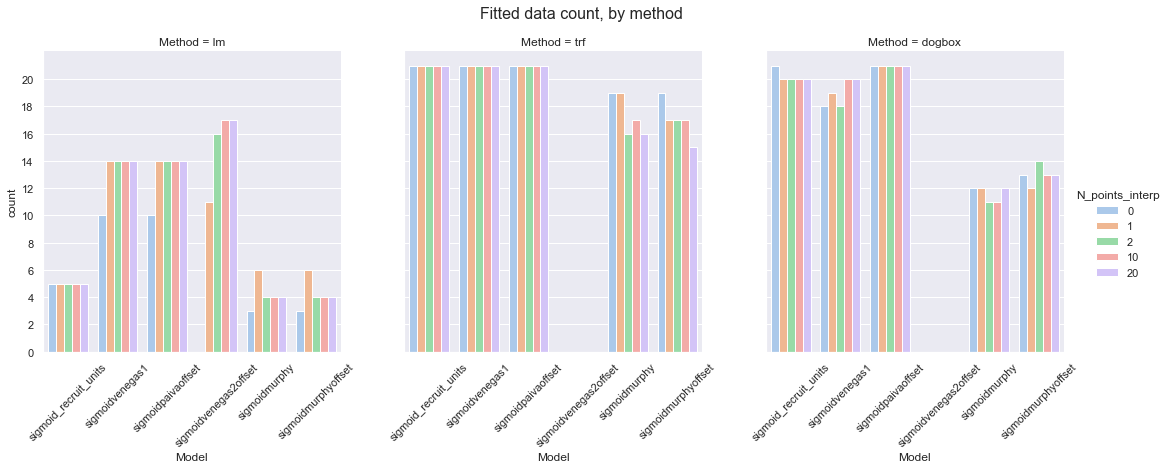

In [24]:
ax2 = sns.catplot(x="Model", kind="count", hue='N_points_interp',
            palette="pastel", col="Method",
            data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=45)
plt.yticks(np.arange(0, 22, step=2))
plt.suptitle('Fitted data count, by method', fontsize=16, y=1.05)
plt.show()
# somando as 3 manobras

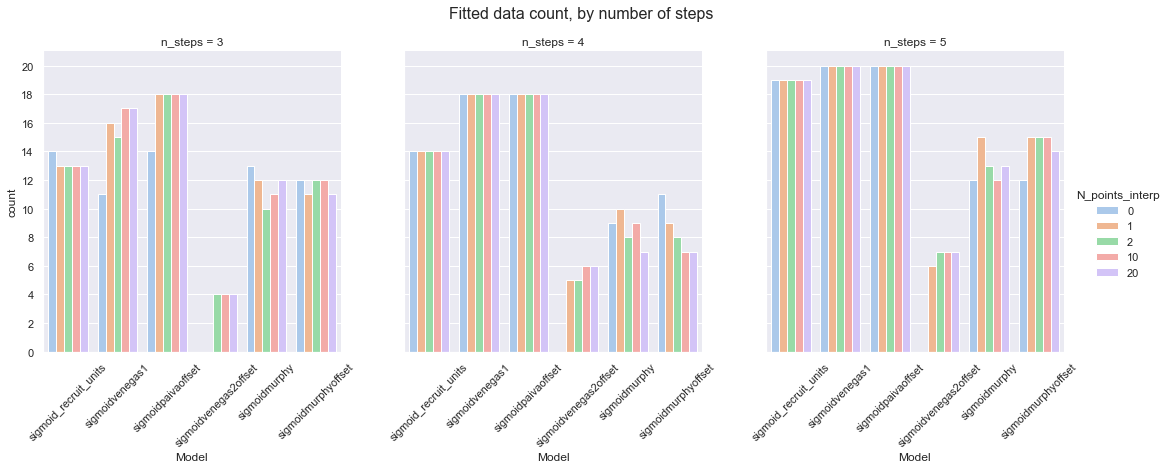

In [25]:
ax2 = sns.catplot(x="Model", kind="count", hue='N_points_interp',
            palette="pastel", col="n_steps",
            data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=45)
plt.yticks(np.arange(0, 22, step=2))
plt.suptitle('Fitted data count, by number of steps', fontsize=16, y=1.05)
plt.show()
# somando os 3 métodos

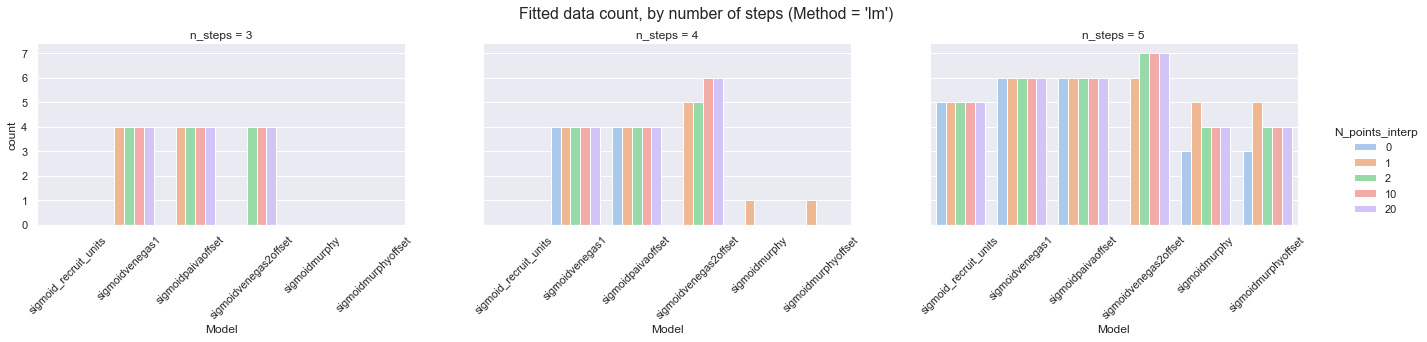

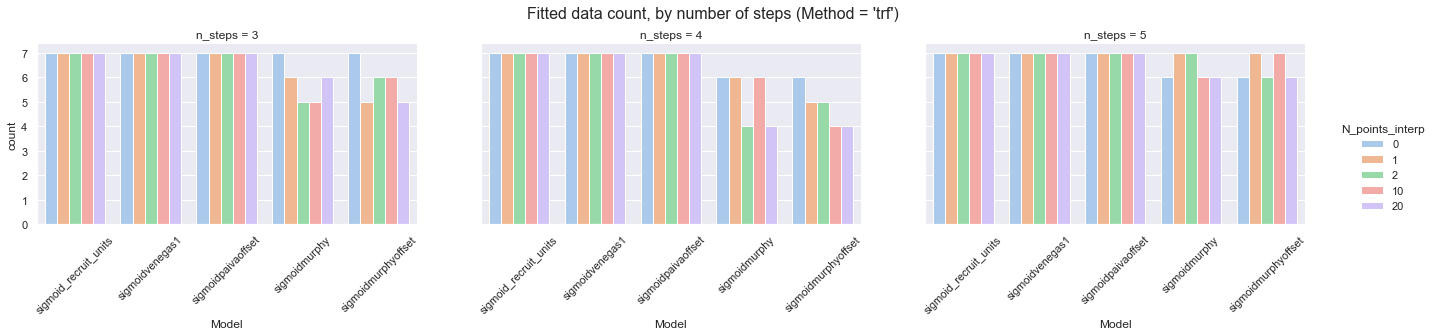

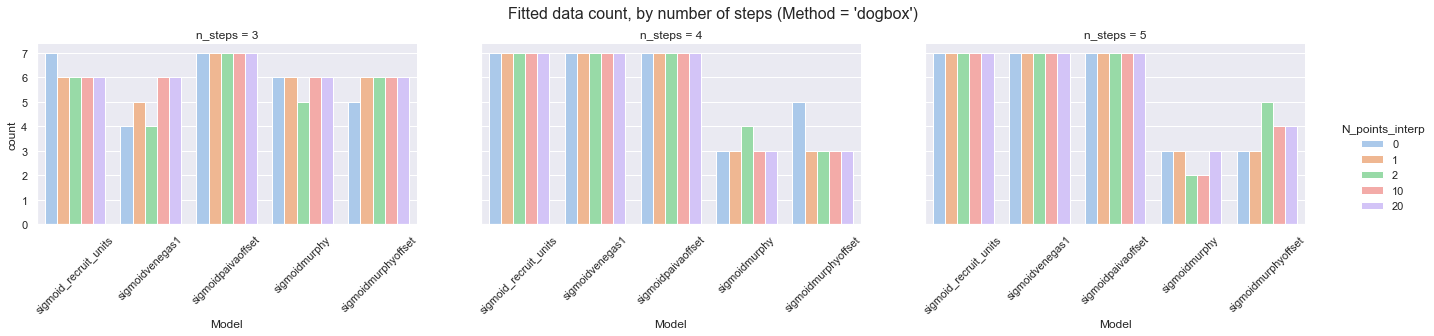

In [26]:
#plt.figure(figsize=(6,4))
for met,df in zip(('lm','trf','dogbox'),(resultdf_indiv_fitted_lm,resultdf_indiv_fitted_trf,resultdf_indiv_fitted_dogbox)):
    ax2 = sns.catplot(x="Model", kind="count", hue='N_points_interp',
                palette="pastel", col="n_steps",
                data=df)
    ax2.set_xticklabels(rotation=45)
    plt.suptitle('Fitted data count, by number of steps (Method = \''+met+'\')', fontsize=16, y=1.1)
    #print(plt.gcf().get_size_inches())
    plt.gcf().set_size_inches(20,3)
    plt.show()

### Erros

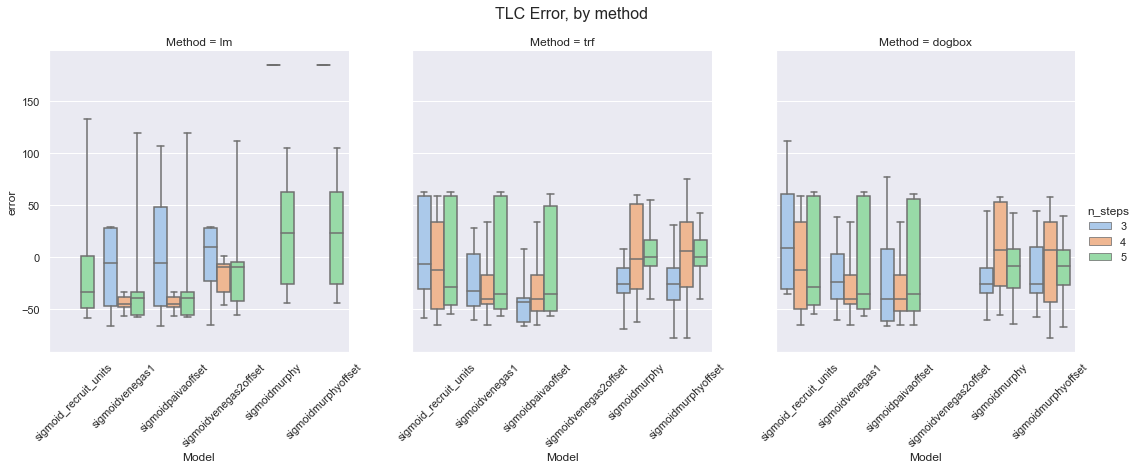

In [27]:
ax2 = sns.catplot(x="Model", y="error", kind="box", 
                  whis = 10, col='Method', hue='n_steps', palette="pastel",
                  data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=45)
plt.suptitle('TLC Error, by method', fontsize=16, y=1.05)
plt.show()

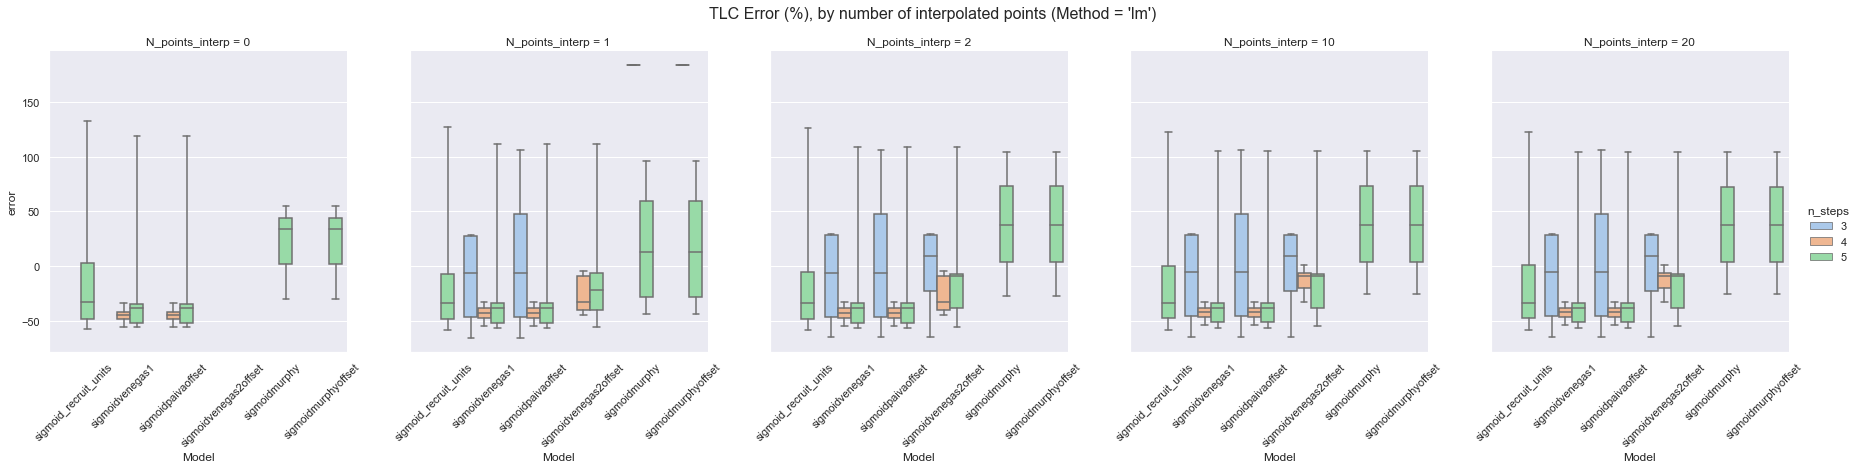

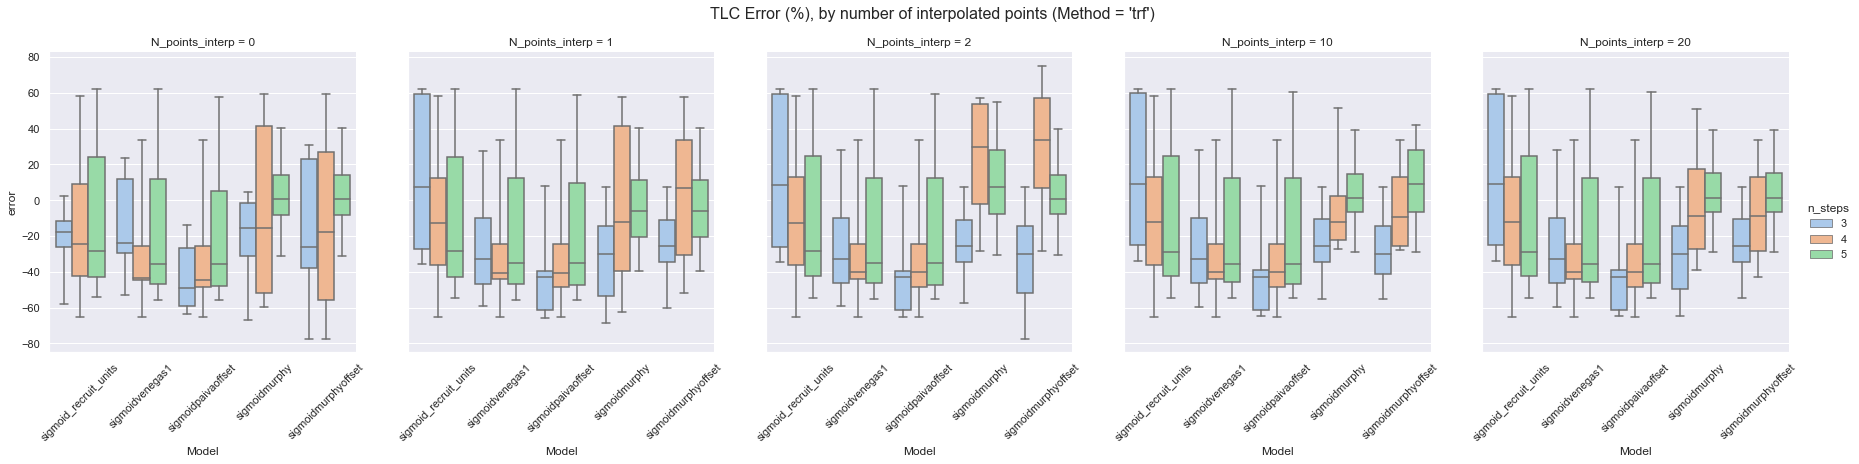

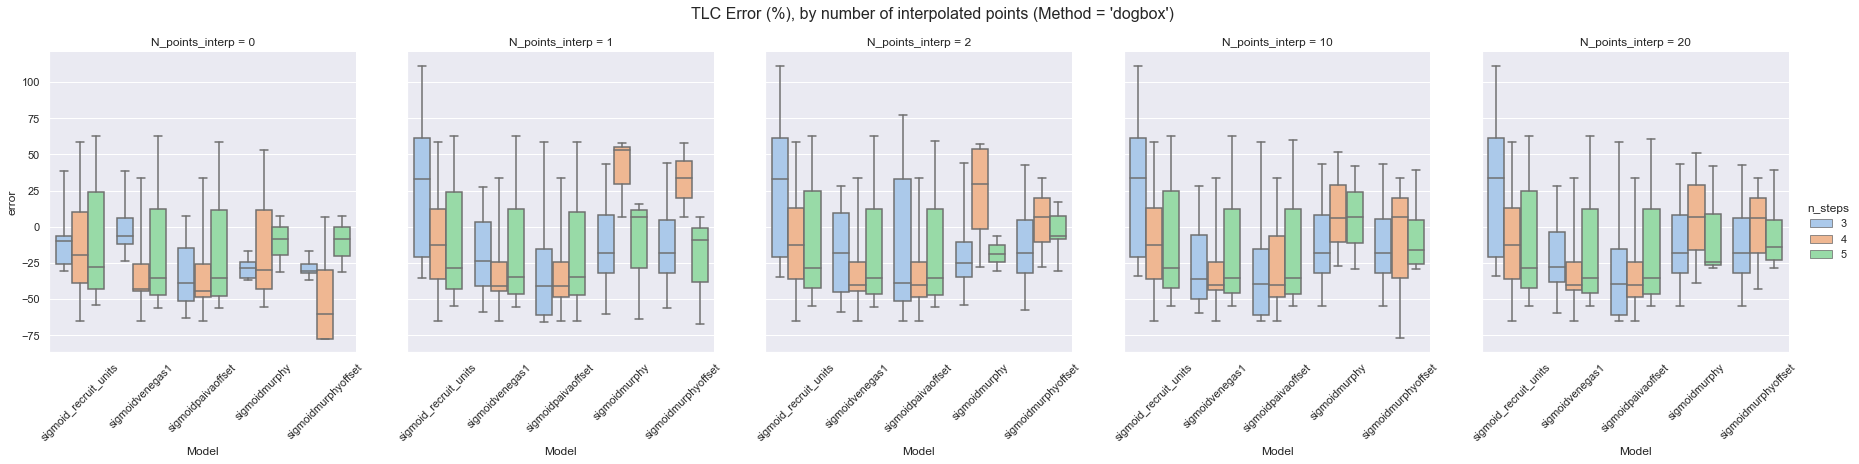

In [28]:
for met,df in zip(('lm','trf','dogbox'),(resultdf_indiv_fitted_lm,resultdf_indiv_fitted_trf,resultdf_indiv_fitted_dogbox)):
    ax2 = sns.catplot(x="Model", y="error", kind="box", 
                      whis = 10, col='N_points_interp', hue='n_steps', palette="pastel",
                      data=df)
    ax2.set_xticklabels(rotation=45)
    plt.suptitle('TLC Error (%), by number of interpolated points (Method = \''+met+'\')', fontsize=16, y=1.05)
    plt.show()

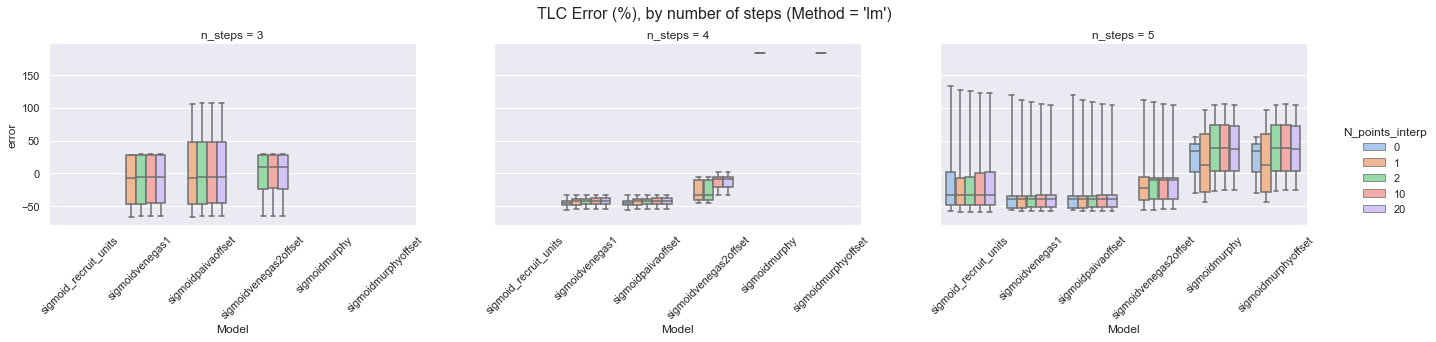

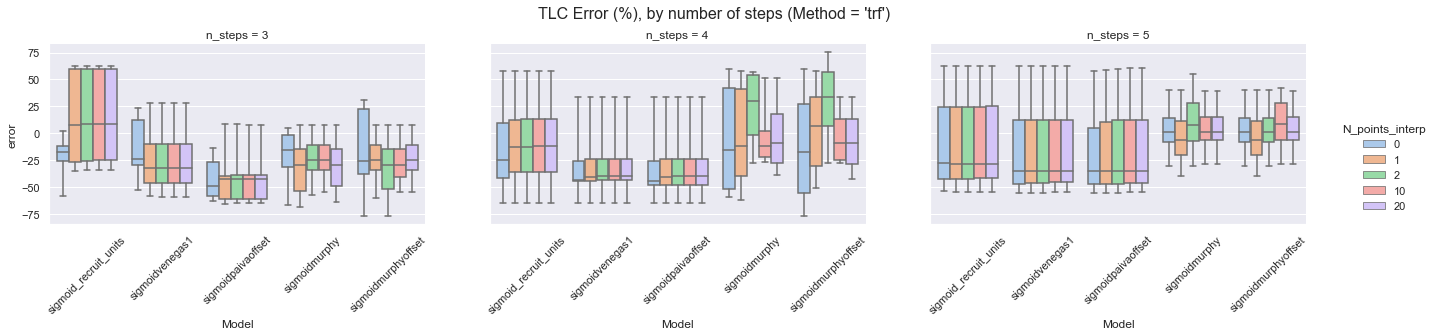

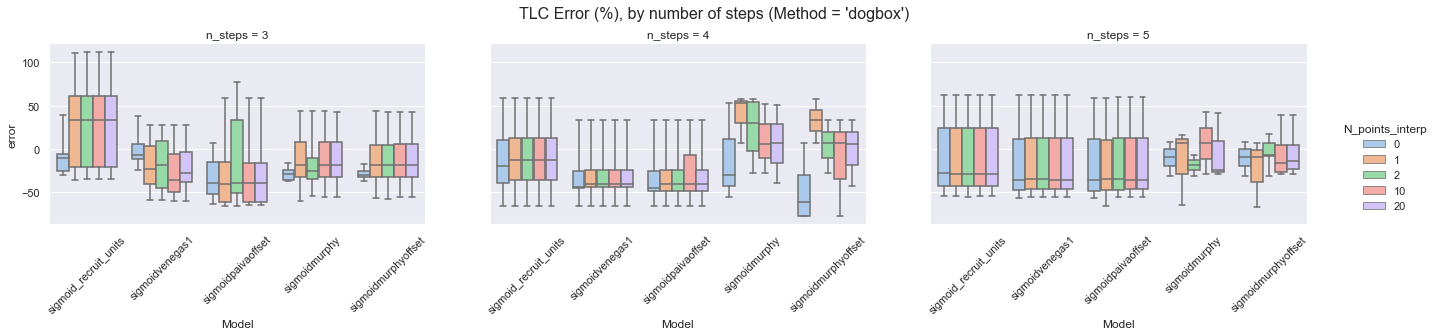

In [29]:
for met,df in zip(('lm','trf','dogbox'),(resultdf_indiv_fitted_lm,resultdf_indiv_fitted_trf,resultdf_indiv_fitted_dogbox)):
    ax2 = sns.catplot(x="Model", y="error", kind="box", 
                      whis = 10, col='n_steps', hue='N_points_interp', palette="pastel",
                      data=df)
    ax2.set_xticklabels(rotation=45)
    plt.gcf().set_size_inches(20,3)
    plt.suptitle('TLC Error (%), by number of steps (Method = \''+met+'\')', fontsize=16, y=1.1)
    plt.show()

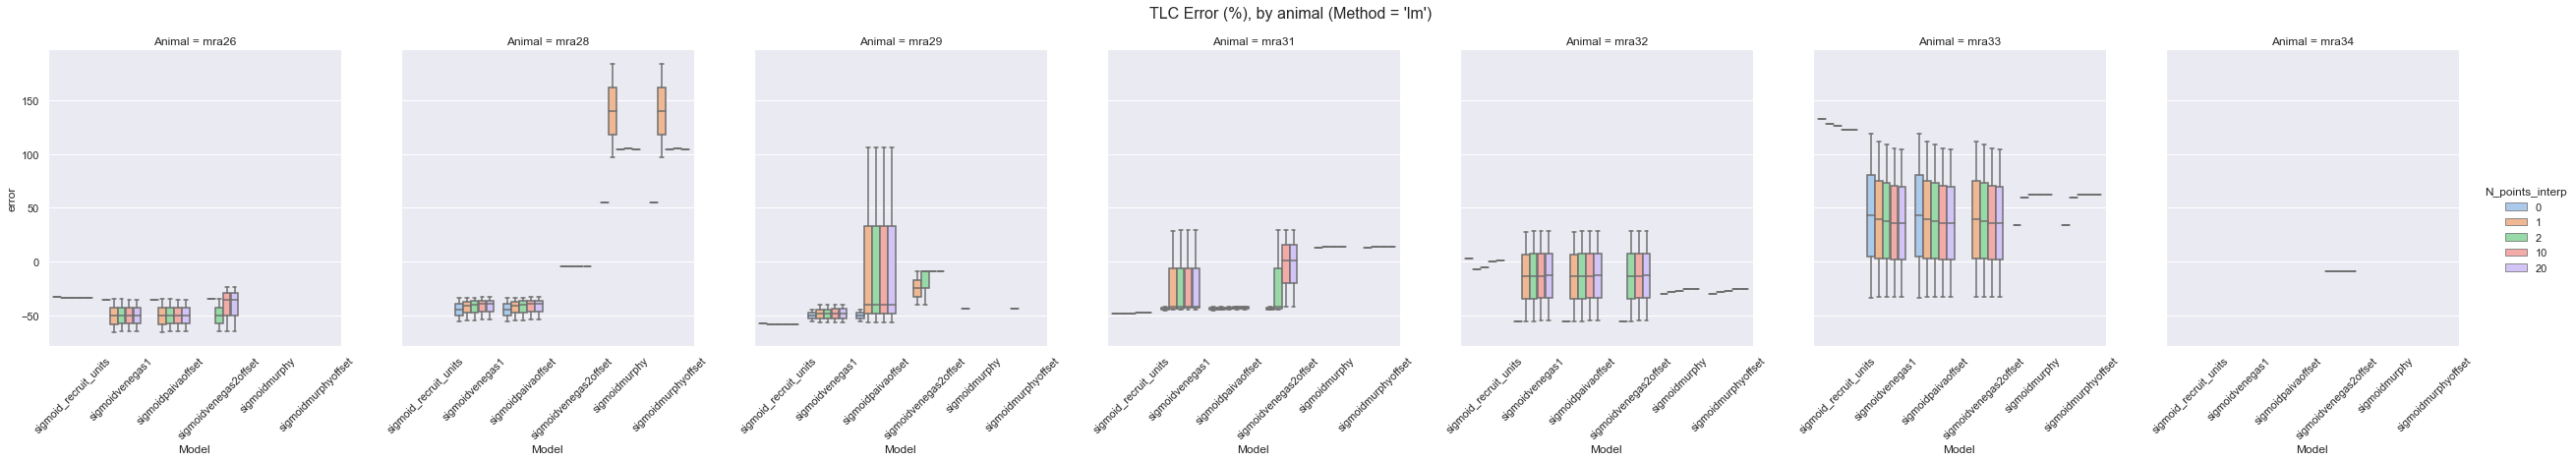

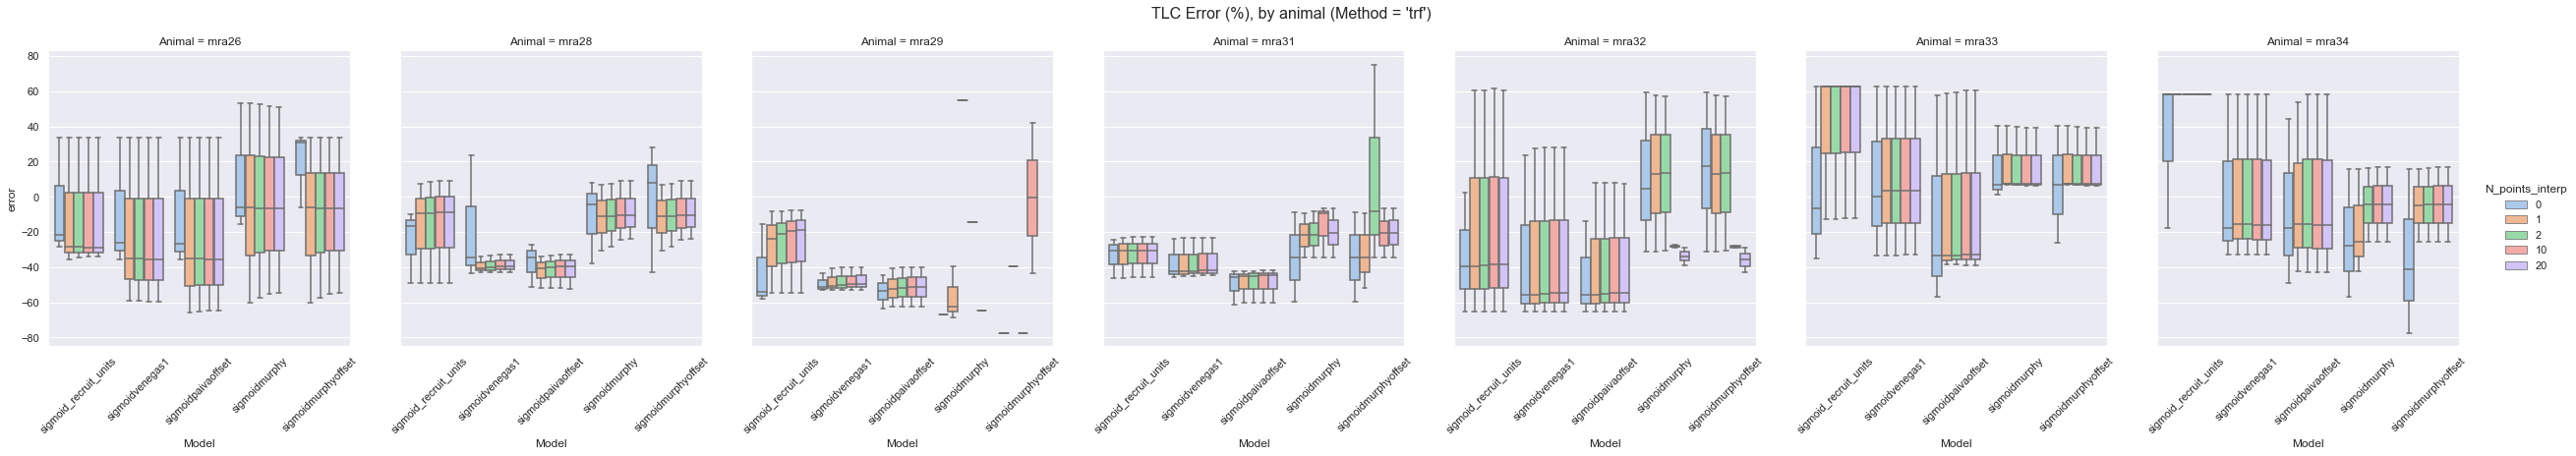

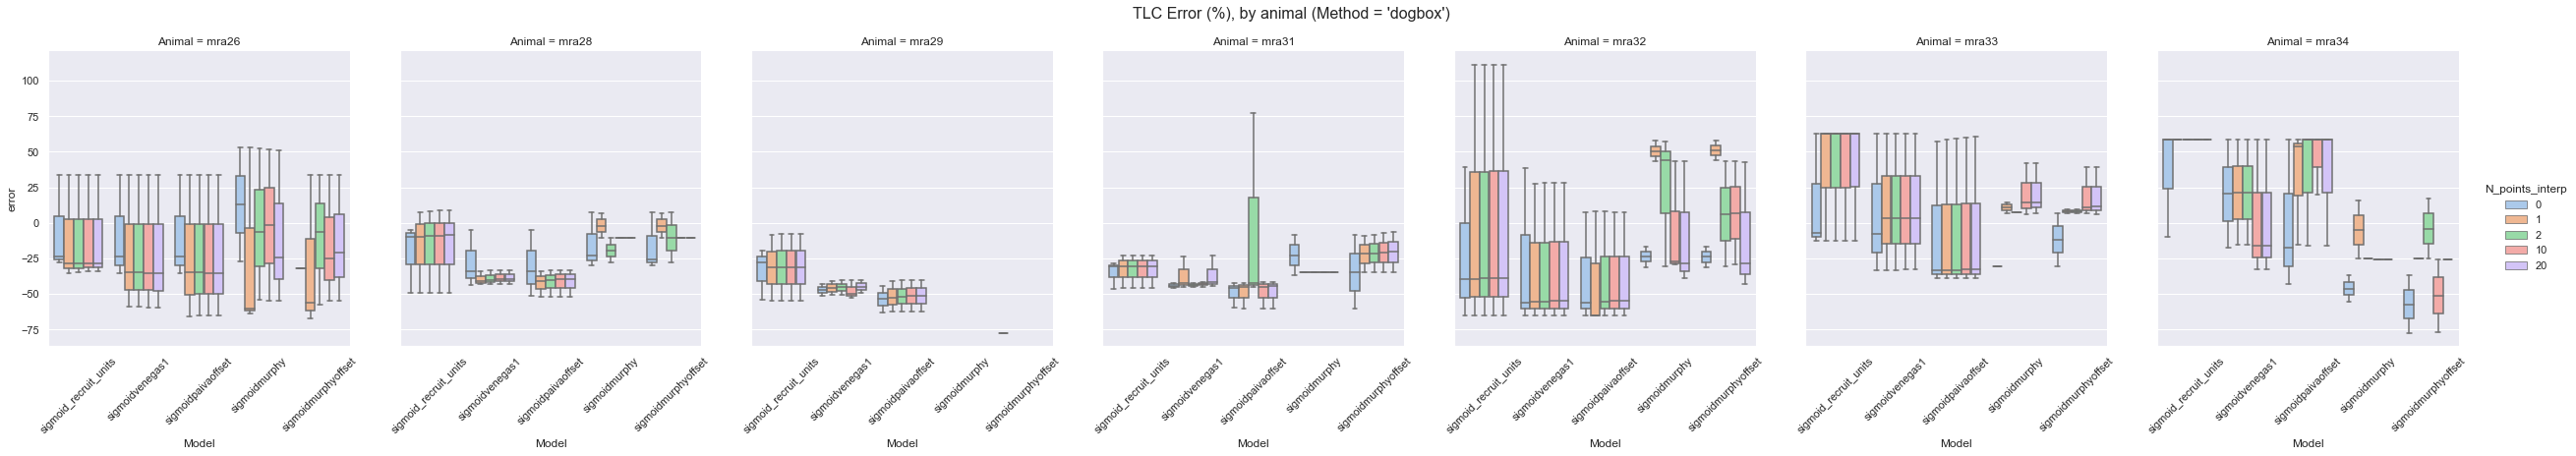

In [30]:
for met,df in zip(('lm','trf','dogbox'),(resultdf_indiv_fitted_lm,resultdf_indiv_fitted_trf,resultdf_indiv_fitted_dogbox)):
    ax2 = sns.catplot(x="Model", y="error", kind="box", 
                      whis = 10, col='Animal', hue='N_points_interp', palette="pastel",
                      col_order = ('mra26','mra28','mra29','mra31','mra32','mra33','mra34'),
                      data=df)
    ax2.set_xticklabels(rotation=45)
    plt.suptitle('TLC Error (%), by animal (Method = \''+met+'\')', fontsize=16, y=1.05)
    plt.show()

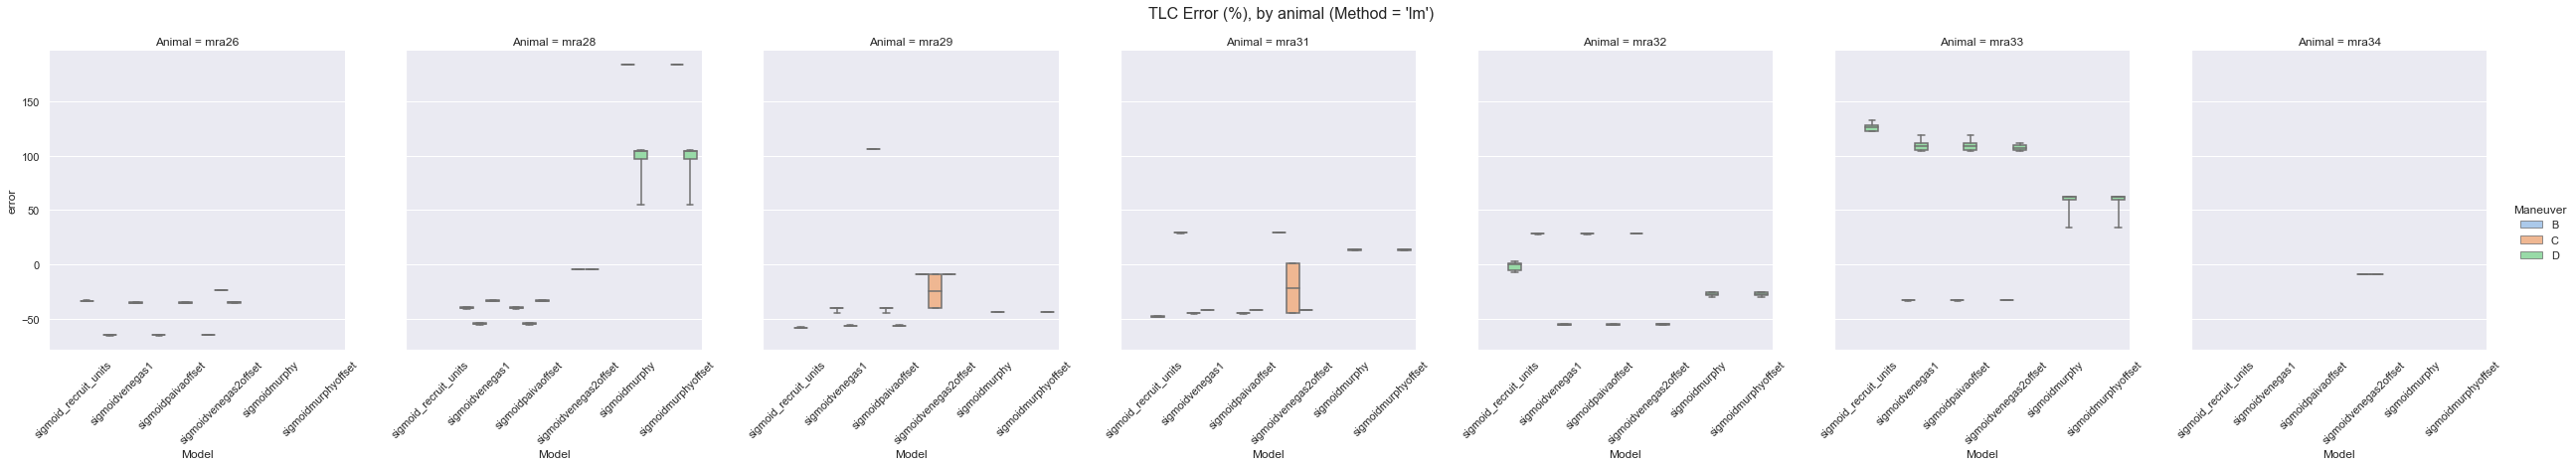

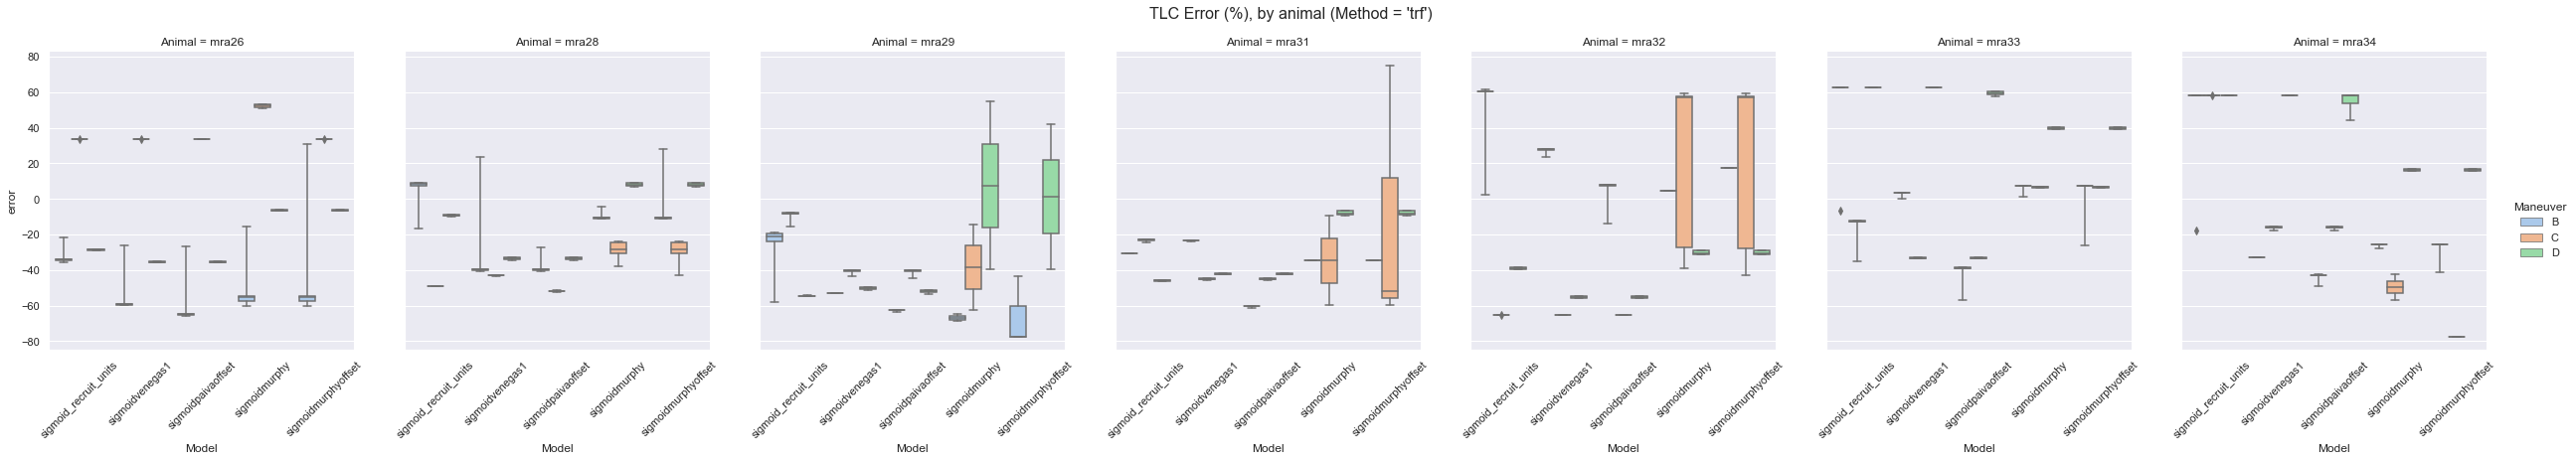

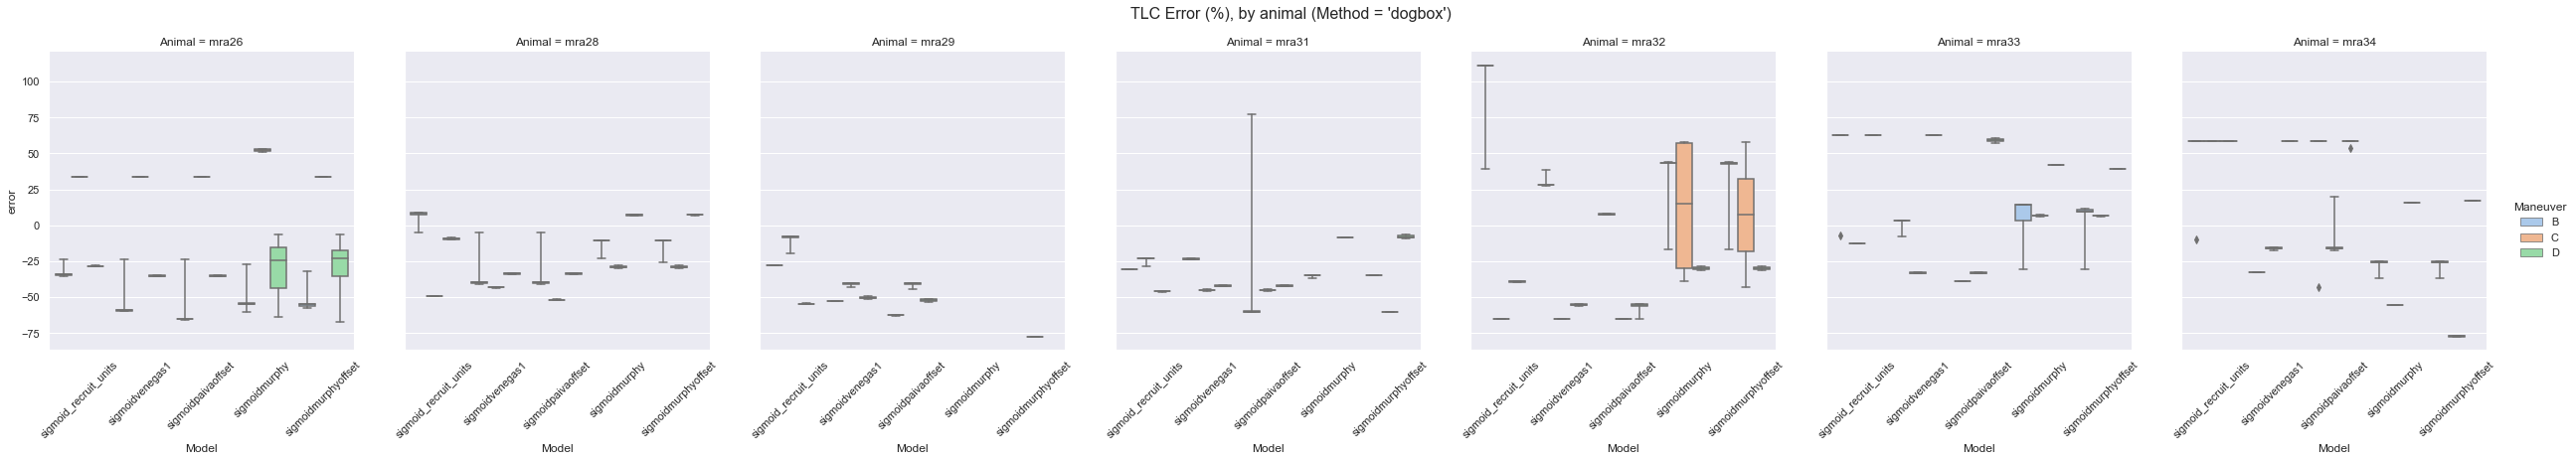

In [31]:
for met,df in zip(('lm','trf','dogbox'),(resultdf_indiv_fitted_lm,resultdf_indiv_fitted_trf,resultdf_indiv_fitted_dogbox)):
    ax2 = sns.catplot(x="Model", y="error", kind="box", 
                      whis = 1000, col='Animal', hue='Maneuver', palette="pastel",
                      col_order = ('mra26','mra28','mra29','mra31','mra32','mra33','mra34'),
                      hue_order = ('B','C','D'),
                      data=df)
    ax2.set_xticklabels(rotation=45)
    plt.suptitle('TLC Error (%), by animal (Method = \''+met+'\')', fontsize=16, y=1.05)
    plt.show()

# Exemplos de curvas

In [ ]:
df_curvas = resultdf_indiv_fitted_trf